<a href="https://colab.research.google.com/github/luisguiserrano/discrete-dynamical-systems/blob/main/Discrete_Dynamical_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Dynamical Systems
This codelab accompanies the YouTube [video](https://www.youtube.com/watch?v=7SfocUa8gis) from the [Serrano.Academy](https://www.youtube.com/c/LuisSerrano) Channel

First, we'll visualize the state vectors as we multiply them by the transition matrix repeatedly. Notice that no matter where they start, they converge to the vector (6/9, 2/9, 1/9). Feel free to play changing the initial state, and check that this convergence holds.

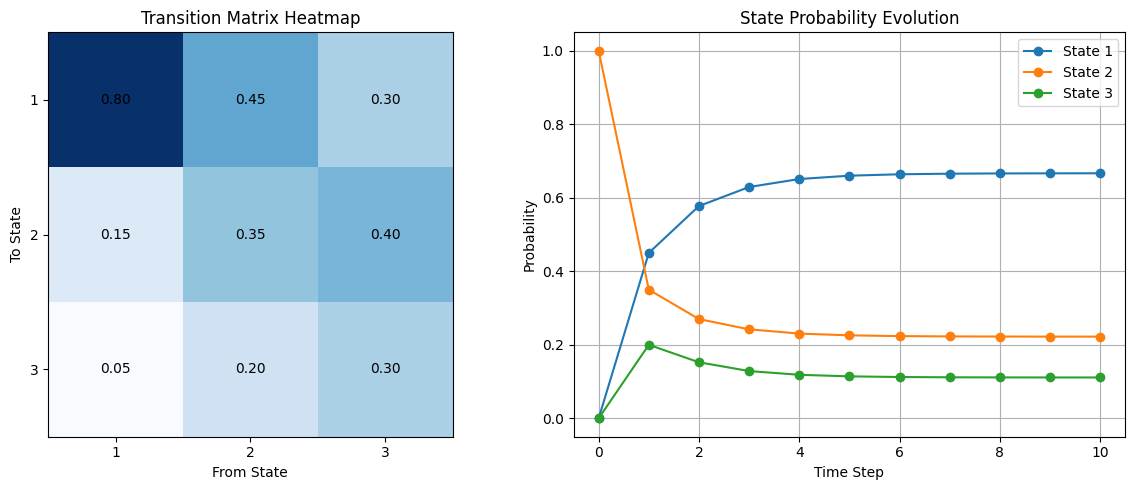

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
A = np.array([[0.8, 0.45, 0.3],
              [0.15, 0.35, 0.4],
              [0.05, 0.2, 0.3]])

# Simulate the dynamical system
x0 = np.array([0, 1, 0])  # Initial state (probability vector)
steps = 10
history = np.zeros((steps + 1, 3))
history[0] = x0

for t in range(steps):
    x0 = A @ x0  # Matrix multiplication
    history[t + 1] = x0

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap of the transition matrix
im = ax1.imshow(A, cmap='Blues')
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
ax1.set_xticklabels(['1', '2', '3'])
ax1.set_yticklabels(['1', '2', '3'])
ax1.set_xlabel('From State')
ax1.set_ylabel('To State')
ax1.set_title('Transition Matrix Heatmap')

# Annotate heatmap with probability values
for i in range(3):
    for j in range(3):
        ax1.text(j, i, f"{A[i, j]:.2f}",
                ha="center", va="center", color="black")

# Evolution plot
for i in range(3):
    ax2.plot(history[:, i], 'o-', label=f'State {i+1}')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Probability')
ax2.set_title('State Probability Evolution')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Now, let's visualize the three eigenvectors in 3D.
The eigenvector with eigenvalue 1 is the steady state.
The other two have eigenvalues between 0 and 1, and point at the direction in which any state moves towards the steady state. The eigenvalue tells us how fast it moves towards the steady state.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Transition matrix and steady-state vector
A = np.array([[0.8, 0.45, 0.3],
              [0.15, 0.35, 0.4],
              [0.05, 0.2, 0.3]])
steady_state = np.array([6/9, 2/9, 1/9])

# Compute eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(A)

# Find steady state eigenvector
idx = np.argmin(np.abs(eigenvals - 1))
v1 = eigenvecs[:, idx].real
v1 = v1 / v1.sum()

# Get other eigenvalues/vectors
other_indices = np.delete(np.arange(3), idx)
λ_other = eigenvals[other_indices]
v_other = eigenvecs[:, other_indices]

# Handle complex components
v2 = v_other[:, 0].real
v3 = v_other[:, 1].real
λ2 = λ_other[0].real
λ3 = λ_other[1].real

# Create figure
fig = go.Figure()

# Add simplex triangle
vertices = np.array([[1,0,0], [0,1,0], [0,0,1]])
for edge in [[0,1], [0,2], [1,2]]:
    fig.add_trace(go.Scatter3d(
        x=vertices[edge, 0],
        y=vertices[edge, 1],
        z=vertices[edge, 2],
        mode='lines',
        line=dict(color='gray', dash='dot'),
        showlegend=False
    ))

# Add stability line
t = np.linspace(-0.5, 1.5, 100)
stability_line = np.outer(t, steady_state)
fig.add_trace(go.Scatter3d(
    x=stability_line[:, 0],
    y=stability_line[:, 1],
    z=stability_line[:, 2],
    mode='lines',
    line=dict(color='blue', width=4),
    name='Stability Line'
))

# Add eigenvectors (scaled)
scale = 0.2
for vec, color, name in [(v2, 'purple', f'v2 (λ={λ2:.2f})'),
                        (v3, 'green', f'v3 (λ={λ3:.2f})')]:
    fig.add_trace(go.Scatter3d(
        x=[steady_state[0], steady_state[0] + scale*vec[0]],
        y=[steady_state[1], steady_state[1] + scale*vec[1]],
        z=[steady_state[2], steady_state[2] + scale*vec[2]],
        mode='lines+markers',
        marker=dict(size=4, color=color),
        line=dict(color=color, width=4),
        name=name
    ))

# Add trajectories
def simulate(x0, steps=15):
    trajectory = [x0]
    for _ in range(steps):
        x0 = A @ x0
        trajectory.append(x0)
    return np.array(trajectory)

colors = ['red', 'orange', 'magenta']

# Add steady state point (updated marker symbol)
fig.add_trace(go.Scatter3d(
    x=[steady_state[0]],
    y=[steady_state[1]],
    z=[steady_state[2]],
    mode='markers',
    marker=dict(
        size=8,
        color='gold',
        symbol='diamond'  # Changed from 'star' to valid 3D symbol
    ),
    name='Steady State'
))
# Configure layout
fig.update_layout(
    title='Interactive 3D Visualization of Dynamical System Convergence',
    scene=dict(
        xaxis=dict(title='State 1', range=[0,1]),
        yaxis=dict(title='State 2', range=[0,1]),
        zaxis=dict(title='State 3', range=[0,1]),
        camera=dict(eye=dict(x=-1.5, y=-1.5, z=1.5))  # Initial view angle
    ),
    width=1000,
    height=800,
    legend=dict(x=0.9, y=0.9)
)

# Show interactive plot
fig.show()

Here we've drawn some trajectories of random points, and how they move towards the steady state. Feel free to draw your own and see how they converge to the steady state.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Transition matrix and steady-state vector
A = np.array([[0.8, 0.45, 0.3],
              [0.15, 0.35, 0.4],
              [0.05, 0.2, 0.3]])
steady_state = np.array([6/9, 2/9, 1/9])

# Compute eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(A)

# Find steady state eigenvector
idx = np.argmin(np.abs(eigenvals - 1))
v1 = eigenvecs[:, idx].real
v1 = v1 / v1.sum()

# Get other eigenvalues/vectors
other_indices = np.delete(np.arange(3), idx)
λ_other = eigenvals[other_indices]
v_other = eigenvecs[:, other_indices]

# Handle complex components
v2 = v_other[:, 0].real
v3 = v_other[:, 1].real
λ2 = λ_other[0].real
λ3 = λ_other[1].real

# Create figure
fig = go.Figure()

# Add simplex triangle
vertices = np.array([[1,0,0], [0,1,0], [0,0,1]])
for edge in [[0,1], [0,2], [1,2]]:
    fig.add_trace(go.Scatter3d(
        x=vertices[edge, 0],
        y=vertices[edge, 1],
        z=vertices[edge, 2],
        mode='lines',
        line=dict(color='gray', dash='dot'),
        showlegend=False
    ))

# Add stability line
t = np.linspace(-0.5, 1.5, 100)
stability_line = np.outer(t, steady_state)
fig.add_trace(go.Scatter3d(
    x=stability_line[:, 0],
    y=stability_line[:, 1],
    z=stability_line[:, 2],
    mode='lines',
    line=dict(color='blue', width=4),
    name='Stability Line'
))

# Add eigenvectors (scaled)
scale = 0.2
for vec, color, name in [(v2, 'purple', f'v2 (λ={λ2:.2f})'),
                        (v3, 'green', f'v3 (λ={λ3:.2f})')]:
    fig.add_trace(go.Scatter3d(
        x=[steady_state[0], steady_state[0] + scale*vec[0]],
        y=[steady_state[1], steady_state[1] + scale*vec[1]],
        z=[steady_state[2], steady_state[2] + scale*vec[2]],
        mode='lines+markers',
        marker=dict(size=4, color=color),
        line=dict(color=color, width=4),
        name=name
    ))

# Add trajectories
def simulate(x0, steps=15):
    trajectory = [x0]
    for _ in range(steps):
        x0 = A @ x0
        trajectory.append(x0)
    return np.array(trajectory)

colors = ['red', 'orange', 'magenta']
for i, initial in enumerate([np.array([1,0,0]), np.array([0.5,0.5,0]), np.array([0,0,1])]):
    traj = simulate(initial)
    fig.add_trace(go.Scatter3d(
        x=traj[:, 0],
        y=traj[:, 1],
        z=traj[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color=colors[i]),
        line=dict(color=colors[i], width=2),
        name=f'Start: {initial}'
    ))

# Add steady state point (updated marker symbol)
fig.add_trace(go.Scatter3d(
    x=[steady_state[0]],
    y=[steady_state[1]],
    z=[steady_state[2]],
    mode='markers',
    marker=dict(
        size=8,
        color='gold',
        symbol='diamond'  # Changed from 'star' to valid 3D symbol
    ),
    name='Steady State'
))
# Configure layout
fig.update_layout(
    title='Interactive 3D Visualization of Dynamical System Convergence',
    scene=dict(
        xaxis=dict(title='State 1', range=[0,1]),
        yaxis=dict(title='State 2', range=[0,1]),
        zaxis=dict(title='State 3', range=[0,1]),
        camera=dict(eye=dict(x=-1.5, y=-1.5, z=1.5))  # Initial view angle
    ),
    width=1000,
    height=800,
    legend=dict(x=0.9, y=0.9)
)

# Show interactive plot
fig.show()